In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


In [4]:
sns.clustermap(data=toy_data, figsize=(4,4))

<img src='./plots/clustermap-1.png'>

In [5]:
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
cars.groupby('origin')[['horsepower', 'weight', 'mpg']].mean()

,horsepower,weight,mpg
origin,,,
europe,80.558824,2423.300000,27.891429
japan,79.835443,2221.227848,30.450633
usa,119.048980,3361.931727,20.083534


In [7]:
sns.clustermap(
    data=cars.groupby('origin')[['horsepower', 'weight', 'mpg']].mean(),
    figsize=(4,4)
)

<img src='./plots/clustermap-2.png'>

### Why is `horsepower & mpg ` colored black ?
#### here the data is not scaled -- hence we are getting this incorrect result

In [13]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### standardize

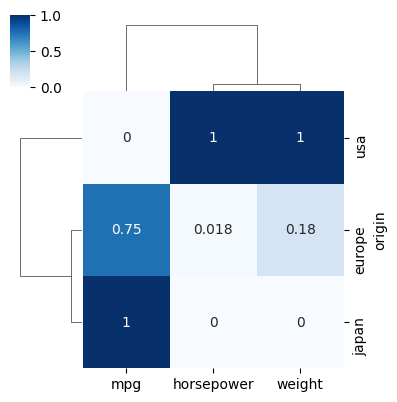

In [17]:
sns.clustermap(    
    data=cars.groupby('origin')[['horsepower', 'weight', 'mpg']].mean(),
    standard_scale=1, annot=True, cmap="Blues",
    figsize=(4,4))

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
sns.regplot(
    data=cars, x='weight', y='horsepower', 
    scatter_kws={'lw':1, 'color':'grey', 'ec':'black'},
    line_kws={'color':'red'},
    ax=ax[0]
)
sns.regplot(
    data=cars, x='mpg', y='horsepower', 
    scatter_kws={'lw':1, 'color':'grey', 'ec':'black'},
    line_kws={'color':'red'}, lowess=True,
    ax=ax[1]
)


<img src='./plots/clustermap-3.png'>

In [41]:
pen = sns.load_dataset('penguins').dropna()
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [43]:
sns.clustermap(
    data=pen.select_dtypes(include=float),
    
)

<img src='./plots/clustermap-4.png'>

## * data has  different scale

### scale the data 

#### `standard_scale`
* 0 for scaling the row
* 1 for scaling the col

In [45]:
sns.clustermap(
    data=pen.select_dtypes(include=float),

    standard_scale=1
    # we scaled the cols  -- we can see the cols no range from 0 to 1
    
)

<img src='./plots/clustermap-5.png'>

### linkage and metric

In [47]:
sns.clustermap(
    data=pen.select_dtypes(include=float),

    standard_scale=1,
    # we scaled the cols  -- we can see the cols no range from 0 to 1

    method='single'
    
)

<img src='./plots/clustermap-6.png'>

In [49]:
sns.clustermap(
    data=pen.select_dtypes(include=float),

    standard_scale=1,
    # we scaled the cols  -- we can see the cols no range from 0 to 1

    method='complete'
    
)

<img src='./plots/clustermap-7.png'>

In [51]:
sns.clustermap(
    data=pen.select_dtypes(include=float),

    standard_scale=1,
    # we scaled the cols  -- we can see the cols no range from 0 to 1

    metric='cityblock'
    
)

<img src='./plots/clustermap-8.png'>

### `row_color` | helps figuring whether a particular catgory is useful in clustering

In [52]:
colors_map = pen.species.map({'Adelie': 'lightgray', 'Gentoo': 'lightblue', 'Chinstrap':'seagreen'})

In [53]:
pen.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [55]:
sns.clustermap(
    data=pen.select_dtypes(include=float),

    standard_scale=1,
    # we scaled the cols  -- we can see the cols no range from 0 to 1

    metric='cityblock',


    row_colors = colors_map


    
)

<img src='./plots/clustermap-9.png'>